## Using the data in the link below, attempt to model a customer’s propensity to join our loyalty program ##

In [86]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [87]:
customer_data = pd.read_csv('customers_data.csv', index_col=0)
customer_data = customer_data.dropna()
customer_data.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [88]:
customer_data.dtypes

purch_amt                float64
gender                    object
card_on_file              object
age                      float64
days_since_last_purch    float64
loyalty                     bool
dtype: object

In [89]:
customer_data['loyalty'].value_counts()

False    100000
True      20000
Name: loyalty, dtype: int64

In [90]:
customer_data.describe()

,purch_amt,age,days_since_last_purch
count,120000.000000,120000.000000,120000.000000
mean,44.036234,25.803008,56.605908
std,20.473148,10.153072,16.422187
min,-43.950000,-22.000000,-9.000000
25%,30.210000,19.000000,45.000000
50%,43.970000,26.000000,57.000000
75%,57.830000,33.000000,68.000000
max,142.200000,71.000000,125.000000


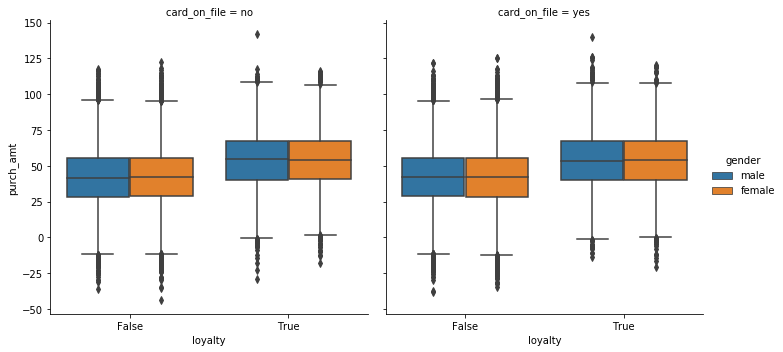

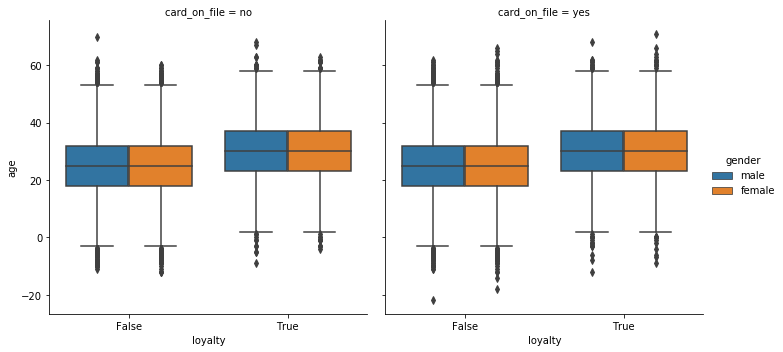

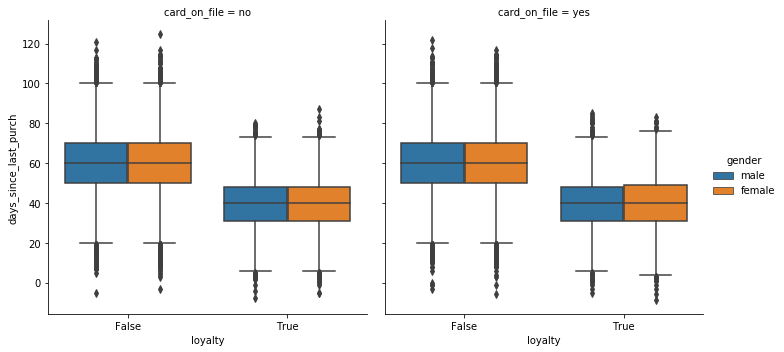

In [91]:
sns.catplot(x='loyalty', y='purch_amt', hue='gender', col='card_on_file', data=customer_data, kind='box')
sns.catplot(x='loyalty', y='age', hue='gender', col='card_on_file', data=customer_data, kind='box')
sns.catplot(x='loyalty', y='days_since_last_purch', hue='gender', col='card_on_file', data=customer_data, kind='box')

In [92]:
lr = LogisticRegression(C=0.1)
y = customer_data['loyalty']
x = customer_data[['purch_amt', 'gender', 'card_on_file', 'age', 'days_since_last_purch']]
x = pd.get_dummies(x)
print(x.head())


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

fit = lr.fit(x_train,y_train)
print('Coefficients')
print(fit.coef_)
print('\n Intercept')
print(fit.intercept_)
pred_y_sklearn = lr.predict(x_test)

print('\n Percentage accuracy')
print(lr.score(x_test, y_test))
print('\n Cross Val Score')
print(cross_val_score(lr, x_test, y_test, cv=5))

TN, FP, FN, TP = confusion_matrix(y_test, pred_y_sklearn).ravel()
print(TN, FP, FN, TP)
sensitivity  = TP / (TP+FN)
print('\n Sensitivity/Recall/TPR:',sensitivity)
specificity  = TN / (TN+FP)
print('\n Specificity/TNR:',specificity)

fpr = FP/(TN+FP)
print('\n False Positive Rate', fpr)
fnr = FN/(FN+TP)
print('\n False Negative Rate', fnr)

print('\n ROC AUC Score:')
print(roc_auc_score(y_test, pred_y_sklearn))

   purch_amt   age  days_since_last_purch  gender_female  gender_male  \
0      19.58  31.0                   35.0              0            1   
1      65.16  23.0                   61.0              0            1   
2      40.60  36.0                   49.0              1            0   
3      38.01  47.0                   57.0              0            1   
4      22.32   5.0                   39.0              1            0   

   card_on_file_no  card_on_file_yes  
0                1                 0  
1                0                 1  
2                1                 0  
3                0                 1  
4                0                 1  
Coefficients
[[ 0.02999692  0.04827827 -0.09995228  0.12956329  0.15551974  0.14394713
   0.14113591]]

 Intercept
[ 0.28508304]

 Percentage accuracy
0.867449494949

 Cross Val Score
[ 0.86706224  0.86376263  0.87234848  0.87070707  0.86336659]
31638 1316 3933 2713

 Sensitivity/Recall/TPR: 0.408215467951

 Specificity/TNR: 

In [93]:
y = customer_data['loyalty']
X = customer_data[['purch_amt', 'gender', 'card_on_file', 'age', 'days_since_last_purch']]
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)

print('RFC Score')
print(rfc.score(X_test,y_test))

print('\n Cross-Validation:')
print(cross_val_score(rfc, X_test, y_test, cv=5))

pred_y_sklearn = rfc.predict(X_test)
TN, FP, FN, TP = confusion_matrix(y_test, pred_y_sklearn).ravel()
print(TN, FP, FN, TP)
sensitivity  = TP / (TP+FN)
print('\n Sensitivity/Recall/TPR:',sensitivity)
specificity  = TN / (TN+FP)
print('\n Specificity/TNR:',specificity)

fpr = FP/(TN+FP)
print('\n False Positive Rate', fpr)
fnr = FN/(FN+TP)
print('\n False Negative Rate', fnr)

print('\nROC AUC Score')
print(roc_auc_score(y_test, pred_y_sklearn))

RFC Score
0.845429292929

 Cross-Validation:
[ 0.8477465   0.84734848  0.85075758  0.84684343  0.84379341]
30941 2013 4108 2538

 Sensitivity/Recall/TPR: 0.381883839904

 Specificity/TNR: 0.938914851004

 False Positive Rate 0.0610851489956

 False Negative Rate 0.618116160096

ROC AUC Score
0.660399345454


In [94]:
importance = pd.DataFrame()
importance['features'] = X_train.columns
importance['scores'] = rfc.feature_importances_

importance.sort_values('scores', ascending=False).head(10)

,features,scores
0,purch_amt,0.421939
2,days_since_last_purch,0.375577
1,age,0.194483
5,card_on_file_no,0.002284
6,card_on_file_yes,0.002270
3,gender_female,0.001727
4,gender_male,0.001719


In [95]:
customer_data_loyal = customer_data[customer_data.loyalty == True]
customer_data_no_loyal = customer_data[customer_data.loyalty == False]

customer_data_downsample = resample(customer_data_no_loyal,
                                   replace=False,
                                   n_samples=20000,
                                   random_state=42)

df_downsampled = pd.concat([customer_data_downsample, customer_data_loyal])

df_downsampled.loyalty.value_counts()

True     20000
False    20000
Name: loyalty, dtype: int64

In [96]:
lr = LogisticRegression(C=0.1)
y = df_downsampled['loyalty']
x = df_downsampled[['purch_amt', 'gender', 'card_on_file', 'age', 'days_since_last_purch']]
x = pd.get_dummies(x)
print(x.head())


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

fit = lr.fit(x_train,y_train)
print('Coefficients')
print(fit.coef_)
print('\n Intercept')
print(fit.intercept_)
pred_y_sklearn = lr.predict(x_test)

print('\n Percentage accuracy')
print(lr.score(x_test, y_test))
print('\n Cross Val Score')
print(cross_val_score(lr, x_test, y_test, cv=5))

TN, FP, FN, TP = confusion_matrix(y_test, pred_y_sklearn).ravel()
print(TN, FP, FN, TP)
sensitivity  = TP / (TP+FN)
print('\n Sensitivity/Recall/TPR:',sensitivity)
specificity  = TN / (TN+FP)
print('\n Specificity/TNR:',specificity)

fpr = FP/(TN+FP)
print('\n False Positive Rate', fpr)
fnr = FN/(FN+TP)
print('\n False Negative Rate', fnr)

print('\n ROC AUC Score:')
print(roc_auc_score(y_test, pred_y_sklearn))

        purch_amt   age  days_since_last_purch  gender_female  gender_male  \
90828       44.07   5.0                   69.0              0            1   
96196       57.84  27.0                   68.0              1            0   
23841       17.16  14.0                   53.0              1            0   
92012       44.87  30.0                   25.0              0            1   
111586      60.15  31.0                   66.0              1            0   

        card_on_file_no  card_on_file_yes  
90828                 0                 1  
96196                 1                 0  
23841                 1                 0  
92012                 1                 0  
111586                0                 1  
Coefficients
[[ 0.03054487  0.04717426 -0.10396209  0.58497411  0.60286724  0.57763835
   0.610203  ]]

 Intercept
[ 1.18784135]

 Percentage accuracy
0.798484848485

 Cross Val Score
[ 0.7921242   0.80984848  0.7844697   0.80075758  0.80485032]
5243 1376 1284 5297

